In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
from tqdm.notebook import tqdm

In [87]:
df = pd.read_csv('dataset/Basket.csv', sep=',')
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,01/12/2009 07:45,"6,95",12,85048
1,United Kingdom,13085.00,PINK CHERRY LIGHTS,489434,01/12/2009 07:45,"6,75",12,79323P
2,United Kingdom,13085.00,WHITE CHERRY LIGHTS,489434,01/12/2009 07:45,"6,75",12,79323W
3,United Kingdom,13085.00,"RECORD FRAME 7"" SINGLE SIZE",489434,01/12/2009 07:45,"2,1",48,22041
4,United Kingdom,13085.00,STRAWBERRY CERAMIC TRINKET BOX,489434,01/12/2009 07:45,"1,25",24,21232
...,...,...,...,...,...,...,...,...
1067366,France,12680.00,CHILDREN'S APRON DOLLY GIRL,581587,09/12/2011 12:50,"2,1",6,22899
1067367,France,12680.00,CHILDRENS CUTLERY DOLLY GIRL,581587,09/12/2011 12:50,"4,15",4,23254
1067368,France,12680.00,CHILDRENS CUTLERY CIRCUS PARADE,581587,09/12/2011 12:50,"4,15",4,23255
1067369,France,12680.00,BAKING SET 9 PIECE RETROSPOT,581587,09/12/2011 12:50,"4,95",3,22138


In [88]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # converting 'InvoiceDate' to datetime
df['Price'] = df['Price'].str.replace(',','.')
df['Price'] =df['Price'].astype(float)

In [89]:
pd.options.display.float_format = '{:.2f}'.format
df.describe() # this function provides a summary of statistical informations

,Customer ID,Price,Quantity
count,824364.00,1067371.00,1067371.00
mean,15324.64,4.65,9.94
std,1697.46,123.55,172.71
min,12346.00,-53594.36,-80995.00
25%,13975.00,1.25,1.00
50%,15255.00,2.10,3.00
75%,16797.00,4.15,10.00
max,18287.00,38970.00,80995.00


In [90]:
df=df[df['Price']>0.01]

In [91]:
df.isnull().any()

Country        False
Customer ID     True
Description    False
Invoice        False
InvoiceDate    False
Price          False
Quantity       False
StockCode      False
dtype: bool

In [92]:
df=df[df['Customer ID'].isnull()==False]

In [93]:
df.dtypes

Country                object
Customer ID           float64
Description            object
Invoice                object
InvoiceDate    datetime64[ns]
Price                 float64
Quantity                int64
StockCode              object
dtype: object

<AxesSubplot:>

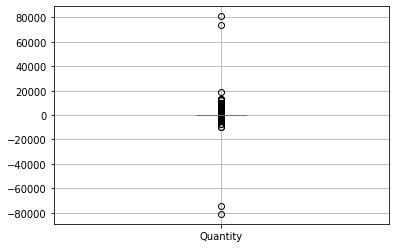

In [11]:
df.boxplot(column=['Quantity'])

In [94]:
df[(df.Invoice.str.contains('C'))]

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
178,Australia,16321.00,PAPER BUNTING WHITE LACE,C489449,2009-01-12 10:33:00,2.95,-12,22087
179,Australia,16321.00,CREAM FELT EASTER EGG BASKET,C489449,2009-01-12 10:33:00,1.65,-6,85206A
180,Australia,16321.00,POTTING SHED SOW 'N' GROW SET,C489449,2009-01-12 10:33:00,4.25,-4,21895
181,Australia,16321.00,POTTING SHED TWINE,C489449,2009-01-12 10:33:00,2.10,-6,21896
182,Australia,16321.00,PAPER CHAIN KIT RETRO SPOT,C489449,2009-01-12 10:33:00,2.95,-12,22083
...,...,...,...,...,...,...,...,...
1065910,United Kingdom,14397.00,ZINC T-LIGHT HOLDER STARS SMALL,C581490,2011-09-12 09:57:00,0.83,-11,23144
1067002,United Kingdom,15498.00,Manual,C581499,2011-09-12 10:28:00,224.69,-1,M
1067176,United Kingdom,15311.00,VICTORIAN SEWING BOX LARGE,C581568,2011-09-12 11:57:00,10.95,-5,21258
1067177,United Kingdom,17315.00,HANGING HEART JAR T-LIGHT HOLDER,C581569,2011-09-12 11:58:00,1.25,-1,84978


In [95]:
df[(df.StockCode.str.contains('A'))]

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
61,United Kingdom,18102.00,CHARLIE+LOLA RED HOT WATER BOTTLE,489438,2009-01-12 09:24:00,3.00,56,84031A
63,United Kingdom,18102.00,CHARLIE+LOLA PINK HOT WATER BOTTLE,489438,2009-01-12 09:24:00,1.90,60,84032A
65,United Kingdom,18102.00,TOMATO CHARLIE+LOLA COASTER SET,489438,2009-01-12 09:24:00,2.15,56,84519A
67,United Kingdom,18102.00,CHARLIE + LOLA BISCUITS TINS,489438,2009-01-12 09:24:00,6.38,60,85132A
69,United Kingdom,18102.00,CHARLIE & LOLA WASTEPAPER BIN BLUE,489438,2009-01-12 09:24:00,2.40,60,85183A
...,...,...,...,...,...,...,...,...
1067059,United Kingdom,17754.00,CHARLIE+LOLA RED HOT WATER BOTTLE,581514,2011-09-12 11:20:00,1.25,10,84031A
1067100,United Kingdom,14446.00,CREAM HANGING HEART T-LIGHT HOLDER,581538,2011-09-12 11:34:00,2.95,1,85123A
1067133,United Kingdom,14446.00,TOMATO CHARLIE+LOLA COASTER SET,581538,2011-09-12 11:34:00,1.25,1,84519A
1067302,United Kingdom,12748.00,75 GREEN PETIT FOUR CASES,581580,2011-09-12 12:20:00,0.42,2,84993A


In [96]:
df[(df.StockCode.str.contains('D'))]

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
197,United Kingdom,17592.00,PINK SWEETHEART BRACELET,C489459,2009-01-12 10:44:00,4.25,-3,90200D
204,United Kingdom,17592.00,CRYSTAL PAIR HEART HAIR SLIDES,C489459,2009-01-12 10:44:00,3.75,-3,90003D
208,United Kingdom,17592.00,DIAMANTE BOW BROOCH BLACK COLOUR,C489459,2009-01-12 10:44:00,6.35,-2,90082D
244,United Kingdom,17592.00,PINK SWEETHEART BRACELET,489462,2009-01-12 10:49:00,4.25,3,90200D
258,United Kingdom,17592.00,CRYSTAL PAIR HEART HAIR SLIDES,489462,2009-01-12 10:49:00,3.75,3,90003D
...,...,...,...,...,...,...,...,...
1065577,United Kingdom,13077.00,4 SKY BLUE DINNER CANDLES,581467,2011-08-12 19:24:00,1.25,3,72801D
1065827,United Kingdom,17364.00,CHILDRENS CUTLERY POLKADOT PINK,581478,2011-09-12 08:59:00,4.15,4,84997D
1067066,United Kingdom,17754.00,SET OF 3 BIRD LIGHT PINK FEATHER,581514,2011-09-12 11:20:00,0.39,12,35471D
1067147,United Kingdom,14446.00,RETRO PLASTIC DAISY TRAY,581538,2011-09-12 11:34:00,0.85,1,79191D


In [26]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [97]:
all_paired = True
count_pairs = count_not_paired = 0
for index, row in tqdm(df[df['Quantity'] < 0].iterrows(), total=len(df[df['Quantity'] < 0]), desc='Iterating over negative Qta rows'):
    df_aux = df[df['Customer ID'] == row['Customer ID']]
    df_aux = df_aux[df_aux['StockCode'] == row['StockCode']]
    df_aux = df_aux[df_aux['Quantity'] > 0]
    if len(df_aux) > 0:
        count_pairs += 1
    else:
        all_paired = False
        count_not_paired += 1

del df_aux

print("All negative entries have a corresponding positive one: ", all_paired)
print("The negative entries which are not matched are: ", count_not_paired)
print("The negative entries which are matched are: ", count_pairs)
assert(len(df[df['Quantity'] < 0]) == count_not_paired + count_pairs)


All negative entries have a corresponding positive one:  False
The negative entries which are not matched are:  1485
The negative entries which are matched are:  17257


In [98]:
#Initialize variables to analyze correctness of negative Qta rows
# Dictionaries indexed by tuple (CustomerID, ProdID, Sale), value is Qta (or (Qta, list(indexes)) )
pos_quant_tot = {}
neg_quant_tot = {}

for index, row in tqdm(df.iterrows(), total=len(df), desc="Iterating over dataset"):
    if row['Quantity'] > 0:
        if (row['Customer ID'], row['StockCode'], row['Price']) not in pos_quant_tot.keys():
            pos_quant_tot[(row['Customer ID'], row['StockCode'], row['Price'])] = row['Quantity']
        else:
            pos_quant_tot[(row['Customer ID'], row['StockCode'], row['Price'])] += row['Quantity']

    elif row['StockCode'] != 'D':  # exclude 'Discount' rows from those dictionaries --> they won't be dropped from df
        if (row['Customer ID'], row['StockCode'], row['Price']) not in neg_quant_tot.keys():
            l = [index]
            neg_quant_tot[(row['Customer ID'], row['StockCode'], row['Price'])] = (-1*row['Quantity'], l)
        else:
            prev = neg_quant_tot[(row['Customer ID'], row['StockCode'], row['Price'])]
            prev[1].append(index)
            neg_quant_tot[(row['Customer ID'], row['StockCode'], row['Price'])] = (prev[0]-row['Quantity'], prev[1])

positive_elements = set(pos_quant_tot.keys())
negative_elements = set(neg_quant_tot.keys())

In [99]:
# drop negative Qta rows that are not matched with positive ones
not_valid = negative_elements - (positive_elements & negative_elements)
indexes_todelete = []
for key in not_valid:
    for x in neg_quant_tot[key][1]:
        indexes_todelete.append(x)
df.drop(indexes_todelete, inplace=True)

In [100]:
# drop negative Qta rows that are invalid ( neg_qta > pos_qta )
indexes_todelete = []
for key in positive_elements & negative_elements:
    if pos_quant_tot[key] < neg_quant_tot[key][0]:
            for x in neg_quant_tot[key][1]:
                indexes_todelete.append(x)
df.drop(indexes_todelete, inplace=True)

In [101]:
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.00,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.00,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.00,"RECORD FRAME 7"" SINGLE SIZE",489434,2009-01-12 07:45:00,2.10,48,22041
4,United Kingdom,13085.00,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
...,...,...,...,...,...,...,...,...
1067366,France,12680.00,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
1067367,France,12680.00,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
1067368,France,12680.00,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255
1067369,France,12680.00,BAKING SET 9 PIECE RETROSPOT,581587,2011-09-12 12:50:00,4.95,3,22138


In [102]:
df[df['StockCode']=='BANK CHARGES']

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
18466,United Kingdom,16805.00,Bank Charges,490948,2009-08-12 14:29:00,15.00,1,BANK CHARGES
94431,United Kingdom,16928.00,Bank Charges,498269,2010-02-17 15:03:00,15.00,1,BANK CHARGES
148098,United Kingdom,17539.00,Bank Charges,503497,2010-01-04 12:07:00,15.00,1,BANK CHARGES
149063,United Kingdom,17539.00,Bank Charges,C503571,2010-01-04 15:45:00,15.00,-1,BANK CHARGES
153573,United Kingdom,12843.00,Bank Charges,503960,2010-08-04 16:50:00,15.00,1,BANK CHARGES
167424,United Kingdom,17448.00,Bank Charges,505204,2010-04-20 16:24:00,15.00,1,BANK CHARGES
206572,United Kingdom,17448.00,Bank Charges,509375,2010-05-21 14:40:00,15.00,1,BANK CHARGES
210149,United Kingdom,17448.00,Bank Charges,509669,2010-05-25 12:03:00,15.00,1,BANK CHARGES
231102,United Kingdom,17032.00,Bank Charges,511774,2010-10-06 12:16:00,15.00,1,BANK CHARGES
240612,United Kingdom,14085.00,Bank Charges,512658,2010-06-17 11:24:00,15.00,1,BANK CHARGES


In [103]:
df=df[df['StockCode']!='BANK CHARGES']

In [104]:
df[df['StockCode']=='POST']

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
89,France,12682.00,POSTAGE,489439,2009-01-12 09:28:00,18.00,3,POST
126,USA,12636.00,POSTAGE,489444,2009-01-12 09:55:00,141.00,1,POST
173,Belgium,12362.00,POSTAGE,489447,2009-01-12 10:10:00,130.00,1,POST
625,Germany,12533.00,POSTAGE,489526,2009-01-12 11:50:00,18.00,6,POST
1244,France,12490.00,POSTAGE,489557,2009-01-12 12:52:00,18.00,4,POST
...,...,...,...,...,...,...,...,...
1066677,Germany,12518.00,POSTAGE,581494,2011-09-12 10:13:00,18.00,2,POST
1067191,Germany,12662.00,POSTAGE,581570,2011-09-12 11:59:00,18.00,1,POST
1067228,Germany,12526.00,POSTAGE,581574,2011-09-12 12:09:00,18.00,2,POST
1067229,Germany,12713.00,POSTAGE,581578,2011-09-12 12:16:00,18.00,3,POST


In [105]:
df=df[df['StockCode']!='POST']

In [106]:
df[df['StockCode']=='DOT']

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
842968,United Kingdom,14096.00,DOTCOM POSTAGE,564764,2011-08-30 10:49:00,11.17,1,DOT
849463,United Kingdom,14096.00,DOTCOM POSTAGE,565383,2011-02-09 15:45:00,16.46,1,DOT
859217,United Kingdom,14096.00,DOTCOM POSTAGE,566217,2011-09-09 15:17:00,13.16,1,DOT
864291,United Kingdom,14096.00,DOTCOM POSTAGE,566566,2011-09-13 12:32:00,85.58,1,DOT
876061,United Kingdom,14096.00,DOTCOM POSTAGE,567656,2011-09-21 14:40:00,878.55,1,DOT
887045,United Kingdom,14096.00,DOTCOM POSTAGE,568346,2011-09-26 15:28:00,688.08,1,DOT
898227,United Kingdom,14096.00,DOTCOM POSTAGE,569246,2011-03-10 09:57:00,490.25,1,DOT
915445,United Kingdom,14096.00,DOTCOM POSTAGE,570488,2011-10-10 17:12:00,635.01,1,DOT
927227,United Kingdom,14096.00,DOTCOM POSTAGE,571441,2011-10-17 13:31:00,743.62,1,DOT
941925,United Kingdom,14096.00,DOTCOM POSTAGE,572552,2011-10-24 17:07:00,638.30,1,DOT


In [107]:
df=df[df['StockCode']!='DOT']

In [108]:
df[df['StockCode']=='M']

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
11310,United Kingdom,12970.00,Manual,490300,2009-04-12 14:19:00,0.85,1,M
11311,United Kingdom,12970.00,Manual,490300,2009-04-12 14:19:00,0.21,1,M
17386,United Kingdom,14295.00,Manual,490760,2009-08-12 09:49:00,10.00,1,M
17887,United Kingdom,16210.00,Manual,490881,2009-08-12 12:58:00,10.00,1,M
19542,United Kingdom,13883.00,Manual,490999,2009-08-12 17:26:00,15.95,1,M
...,...,...,...,...,...,...,...,...
1051476,United Kingdom,17857.00,Manual,580645,2011-05-12 13:11:00,219.50,1,M
1051479,United Kingdom,17857.00,Manual,580646,2011-05-12 13:13:00,0.25,800,M
1056337,United Kingdom,15907.00,Manual,580884,2011-06-12 12:21:00,0.85,1,M
1056893,United Kingdom,17841.00,Manual,580956,2011-06-12 14:23:00,1.25,4,M


In [109]:
df=df[df['StockCode']!='M']

In [112]:
df[(df.StockCode.str.contains('TEST'))]

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
27994,United Kingdom,12346.00,This is a test product.,491725,2009-12-14 08:34:00,4.50,10,TEST001
28251,United Kingdom,12346.00,This is a test product.,491742,2009-12-14 11:00:00,4.50,5,TEST001
28254,United Kingdom,12346.00,This is a test product.,491744,2009-12-14 11:02:00,4.50,5,TEST001
39398,United Kingdom,12346.00,This is a test product.,492718,2009-12-18 10:47:00,4.50,5,TEST001
39411,United Kingdom,12346.00,This is a test product.,492722,2009-12-18 10:55:00,1.00,1,TEST002
45228,United Kingdom,12346.00,This is a test product.,493410,2010-04-01 09:24:00,4.50,5,TEST001
45230,United Kingdom,12346.00,This is a test product.,493412,2010-04-01 09:53:00,4.50,5,TEST001
56117,United Kingdom,12346.00,This is a test product.,494450,2010-01-14 13:50:00,4.50,5,TEST001
66084,United Kingdom,12346.00,This is a test product.,495295,2010-01-22 13:30:00,4.50,5,TEST001
156017,United Kingdom,16454.00,This is a test product.,504188,2010-12-04 09:52:00,4.50,5,TEST001


In [113]:
df=df[df['StockCode']!='TEST001']
df=df[df['StockCode']!='TEST002']

In [116]:
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.00,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.00,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.00,"RECORD FRAME 7"" SINGLE SIZE",489434,2009-01-12 07:45:00,2.10,48,22041
4,United Kingdom,13085.00,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
...,...,...,...,...,...,...,...,...
1067365,France,12680.00,PACK OF 20 SPACEBOY NAPKINS,581587,2011-09-12 12:50:00,0.85,12,22613
1067366,France,12680.00,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
1067367,France,12680.00,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
1067368,France,12680.00,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255


<h2>Outliers Detection</h2>

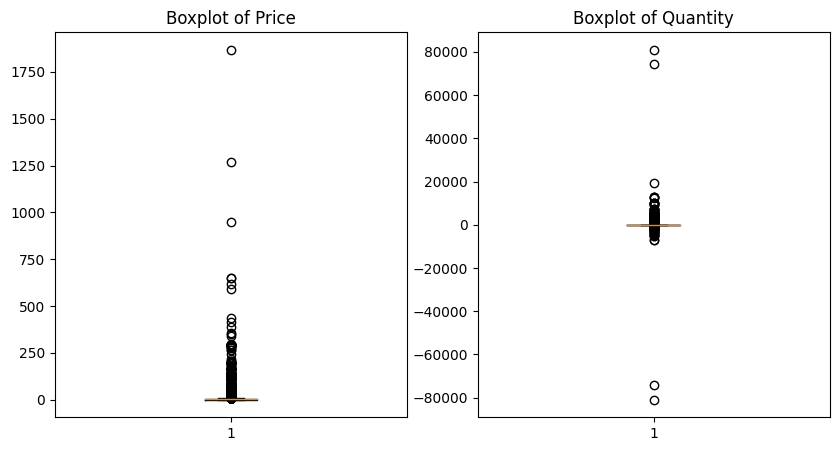

In [117]:
f, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].boxplot(df.Price)
axs[0].set_title('Boxplot of Price')
axs[1].boxplot(df.Quantity)
axs[1].set_title('Boxplot of Quantity')
plt.show()

In [118]:
limit = 10000
print(f"Number of rows with a value of 'Qta' > 10000: {len(df[df['Quantity'] > limit])}")
print(f"Number of rows with a value of 'Qta' < -10000: {len(df[df['Quantity'] < -limit])}")

Number of rows with a value of 'Qta' > 10000: 7
Number of rows with a value of 'Qta' < -10000: 2


In [119]:

# print anomalous rows
print('Rows with a quantity value grater than 60000 or less than -60000:\n')
df[(df['Quantity'] > 60000) | (df['Quantity'] < -60000)]

Rows with a quantity value grater than 60000 or less than -60000:



,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
587080,United Kingdom,12346.00,MEDIUM CERAMIC TOP STORAGE JAR,541431,2011-01-18 10:01:00,1.04,74215,23166
587085,United Kingdom,12346.00,MEDIUM CERAMIC TOP STORAGE JAR,C541433,2011-01-18 10:17:00,1.04,-74215,23166
1065882,United Kingdom,16446.00,"PAPER CRAFT , LITTLE BIRDIE",581483,2011-09-12 09:15:00,2.08,80995,23843
1065883,United Kingdom,16446.00,"PAPER CRAFT , LITTLE BIRDIE",C581484,2011-09-12 09:27:00,2.08,-80995,23843


<AxesSubplot:>

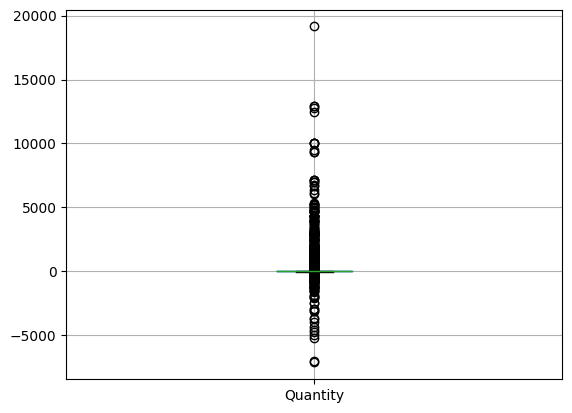

In [120]:
df.drop(df[(df['Quantity'] < -60000) | (df['Quantity'] > 60000)].index, inplace=True)
df.boxplot(column=['Quantity'])

In [121]:
df

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.00,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.00,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.00,"RECORD FRAME 7"" SINGLE SIZE",489434,2009-01-12 07:45:00,2.10,48,22041
4,United Kingdom,13085.00,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
...,...,...,...,...,...,...,...,...
1067365,France,12680.00,PACK OF 20 SPACEBOY NAPKINS,581587,2011-09-12 12:50:00,0.85,12,22613
1067366,France,12680.00,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
1067367,France,12680.00,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
1067368,France,12680.00,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255


In [122]:
df.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket_3.csv', index = False, header=True)

In [123]:
df_09 = df[pd.DatetimeIndex(df['InvoiceDate']).year == 2009.0]
df_09

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
0,United Kingdom,13085.00,15CM CHRISTMAS GLASS BALL 20 LIGHTS,489434,2009-01-12 07:45:00,6.95,12,85048
1,United Kingdom,13085.00,PINK CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323P
2,United Kingdom,13085.00,WHITE CHERRY LIGHTS,489434,2009-01-12 07:45:00,6.75,12,79323W
3,United Kingdom,13085.00,"RECORD FRAME 7"" SINGLE SIZE",489434,2009-01-12 07:45:00,2.10,48,22041
4,United Kingdom,13085.00,STRAWBERRY CERAMIC TRINKET BOX,489434,2009-01-12 07:45:00,1.25,24,21232
...,...,...,...,...,...,...,...,...
45219,United Kingdom,17867.00,FLORAL FOLK STATIONERY SET,493407,2009-12-23 16:04:00,2.95,1,21993
45220,United Kingdom,17867.00,VINTAGE PAISLEY STATIONERY SET,493407,2009-12-23 16:04:00,2.95,1,21992
45221,United Kingdom,17867.00,BOHEMIAN COLLAGE STATIONERY SET,493407,2009-12-23 16:04:00,2.95,1,21991
45222,United Kingdom,17867.00,REX CASH+CARRY JUMBO SHOPPER,493407,2009-12-23 16:04:00,0.95,10,21034


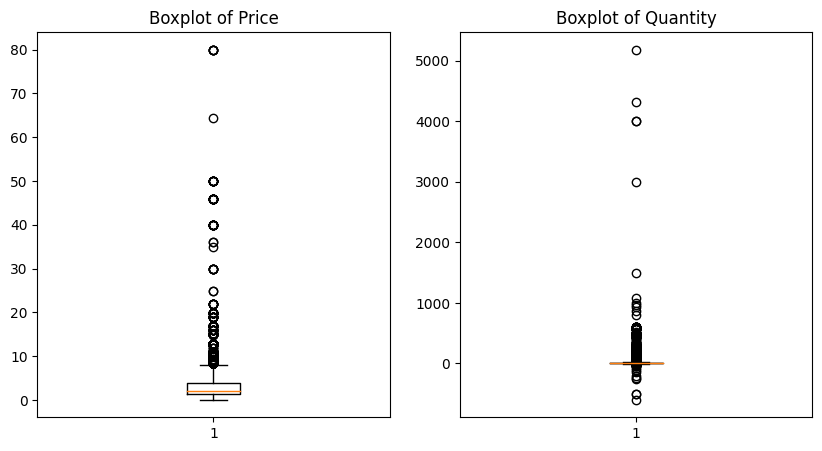

In [124]:
f, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].boxplot(df_09.Price)
axs[0].set_title('Boxplot of Price')
axs[1].boxplot(df_09.Quantity)
axs[1].set_title('Boxplot of Quantity')
plt.show()

In [125]:
df_10 = df[pd.DatetimeIndex(df['InvoiceDate']).year == 2010.0]
df_10

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
45229,United Kingdom,14590.00,RETRO SPOTS BUTTER DISH,C493411,2010-04-01 09:43:00,4.25,-1,21539
45234,United Kingdom,14590.00,RETRO SPOT MUG,493414,2010-04-01 10:28:00,2.55,36,21844
45235,United Kingdom,14590.00,RETRO SPOT LARGE MILK JUG,493414,2010-04-01 10:28:00,4.25,12,21533
45236,United Kingdom,14590.00,NEW ENGLAND CERAMIC CAKE SERVER,493414,2010-04-01 10:28:00,2.55,2,37508
45237,United Kingdom,14590.00,HAND OPEN SHAPE GOLD,493414,2010-04-01 10:28:00,4.25,2,35001G
...,...,...,...,...,...,...,...,...
567909,United Kingdom,18116.00,SET OF 3 BUTTERFLY COOKIE CUTTERS,539988,2010-12-23 16:06:00,1.25,1,84380
567910,United Kingdom,18116.00,HOT BATHS SOAP HOLDER,539988,2010-12-23 16:06:00,1.69,1,84849D
567911,United Kingdom,18116.00,FAIRY SOAP SOAP HOLDER,539988,2010-12-23 16:06:00,1.69,1,84849B
567912,United Kingdom,18116.00,CREAM SWEETHEART EGG HOLDER,539988,2010-12-23 16:06:00,4.95,2,22854


In [126]:
df_11 = df[pd.DatetimeIndex(df['InvoiceDate']).year == 2011.0]
df_11

,Country,Customer ID,Description,Invoice,InvoiceDate,Price,Quantity,StockCode
567942,United Kingdom,13313.00,JUMBO BAG PINK POLKADOT,539993,2011-04-01 10:00:00,1.95,10,22386
567943,United Kingdom,13313.00,BLUE POLKADOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21499
567944,United Kingdom,13313.00,RED RETROSPOT WRAP,539993,2011-04-01 10:00:00,0.42,25,21498
567945,United Kingdom,13313.00,RECYCLING BAG RETROSPOT,539993,2011-04-01 10:00:00,2.10,5,22379
567946,United Kingdom,13313.00,RED RETROSPOT SHOPPER BAG,539993,2011-04-01 10:00:00,1.25,10,20718
...,...,...,...,...,...,...,...,...
1067365,France,12680.00,PACK OF 20 SPACEBOY NAPKINS,581587,2011-09-12 12:50:00,0.85,12,22613
1067366,France,12680.00,CHILDREN'S APRON DOLLY GIRL,581587,2011-09-12 12:50:00,2.10,6,22899
1067367,France,12680.00,CHILDRENS CUTLERY DOLLY GIRL,581587,2011-09-12 12:50:00,4.15,4,23254
1067368,France,12680.00,CHILDRENS CUTLERY CIRCUS PARADE,581587,2011-09-12 12:50:00,4.15,4,23255


In [127]:
df_09.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket_3_2009.csv', index = False, header=True)
df_10.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket_3_2010.csv', index = False, header=True)
df_11.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\new_Basket_3_2011.csv', index = False, header=True)